### Сферы применимости питона
1. Математика, машинное обучение, анализ данных
2. Вебскрепинг
3. Бекенд
4. Утилиты  
И много других!

### Математика, машинное обучение, анализ данных
Библиотеки: numpy, matplotlib, pandas, tqdm

Курсы от ФизТеха: https://www.dlschool.org/ 

#### numpy
Библиотека добавляющая в питон многомерные массивы и матрицы, а также 
функции для работы с ними

In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import numpy as np

# создание матрицы, заполненой случайными целыми чистами от 0 до 10
#  размером 3 на 3
A = np.random.randint(0, 9, size=(3, 3))
B = np.random.randint(0, 9, size=(3, 3))
#  Вывод, сложение и перемножение матриц
A, B, A + B, A * B

(array([[2, 5, 0],
        [3, 7, 4],
        [0, 8, 2]]),
 array([[0, 5, 1],
        [5, 2, 6],
        [6, 1, 0]]),
 array([[ 2, 10,  1],
        [ 8,  9, 10],
        [ 6,  9,  2]]),
 array([[ 0, 25,  0],
        [15, 14, 24],
        [ 0,  8,  0]]))

In [28]:
# Обратная матрица
np.linalg.inv(A)

array([[ 0.27272727,  0.15151515, -0.3030303 ],
       [ 0.09090909, -0.06060606,  0.12121212],
       [-0.36363636,  0.24242424,  0.01515152]])

In [38]:
# Одномерный полином, задается через коэфициенты
poly = np.poly1d((1, 3, -4, 10, 52, -5), variable="x")
print(poly)

   5     4     3      2
1 x + 3 x - 4 x + 10 x + 52 x - 5


In [34]:
# Корни полинома
poly.roots

array([-4.,  1.])

In [39]:
# Производная от полинома
print(poly.deriv())

   4      3      2
5 x + 12 x - 12 x + 20 x + 52


#### matplotlib
Библеотека для отрисовки графиков, данных, зависимостей и тд

In [49]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.9 MB 14.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 59 kB 18.0 MB/s            
  Created wheel for matplotlib: filename=matplotlib-3.4.3-cp38-cp38-macosx_10_14_arm64.whl size=7686885 sha256=af71c044108735b5c288b820cc20b73d84deb00c3220140dd4c6eb688ef1e9f8
  Stored in directory: /Users/teadove/Library/Caches/pip/wheels/7e/f5/55/eb39d3aae4abc1a3a4258b9ea1b7598efd1e0c6763638132d3
Successfully built matplotlib


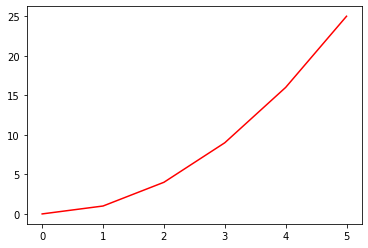

In [45]:
import matplotlib.pyplot as plt

# Простейший график, на вход подается массивы точек X и Y
x = [0, 1, 2, 3, 4, 5]
y = list(map(lambda x: x**2, x))


plt.plot(x, y, c="#FF0000")

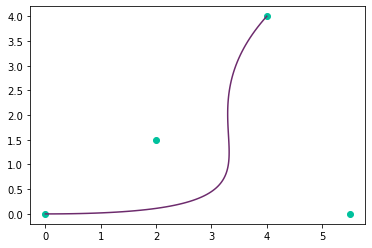

In [47]:
# Функция получения точек кривой безье
def bezier_3(points, step: float = 0.01) -> list:
    to_return = []
    for t in np.arange(0, 1 + step, step):
        x = (
            (1 - t) ** 3 * points[0][0]
            + 3 * (1 - t) ** 2 * t * points[1][0]
            + 3 * (1 - t) * t**2 * points[2][0]
            + t**3 * points[3][0]
        )
        y = (
            (1 - t) ** 3 * points[0][1]
            + 3 * (1 - t) ** 2 * t * points[1][1]
            + 3 * (1 - t) * t**2 * points[2][1]
            + t**3 * points[3][1]
        )
        to_return.append([x, y])
    return np.array(to_return)


# Отрисока кривой безье
def draw(points: list, save_name: str = None):
    x = points[:, 0]
    y = points[:, 1]
    plt.scatter(x, y, c="#00C19D")

    bezier = bezier_3(points)
    x = bezier[:, 0]
    y = bezier[:, 1]
    plt.plot(x, y, c="#6D2B6D")
    if save_name is not None:
        plt.savefig(save_name)


# Контрольный точки кривой
p2 = np.array([[0.0, 0.0], [5.5, 0], [2, 1.5], [4, 4]])
draw(p2)
# Бирюзовый - контрольные точки
# Фиолетовый - кривая безье

#### pandas 
Библеотека для работы с массивами данных в разных форматах, чтения xlsx, csv и тд


In [66]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [48]:
import pandas as pd

data = np.random.randint(0, 9, size=(20, 2))
data

array([[2, 6],
       [5, 3],
       [1, 0],
       [8, 2],
       [7, 0],
       [8, 0],
       [7, 7],
       [8, 1],
       [6, 0],
       [5, 3],
       [6, 6],
       [0, 7],
       [8, 7],
       [8, 3],
       [8, 8],
       [1, 7],
       [1, 6],
       [8, 8],
       [0, 2],
       [3, 0]])

In [51]:
df = pd.DataFrame(data, columns=["first", "second"])
df.head()

,first,second
0,2,6
1,5,3
2,1,0
3,8,2
4,7,0


In [53]:
df.to_csv("df.csv")
!cat df.csv

,first,second
0,2,6
1,5,3
2,1,0
3,8,2
4,7,0
5,8,0
6,7,7
7,8,1
8,6,0
9,5,3
10,6,6
11,0,7
12,8,7
13,8,3
14,8,8
15,1,7
16,1,6
17,8,8
18,0,2
19,3,0


In [113]:
### tqdm - библиотека для отображения процесса прохода по циклу
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [56]:
import time
from tqdm.notebook import tqdm

sum_ = 0
for i in tqdm(range(100)):
    sum_ += 1
    time.sleep(1)
print(sum_)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Вебскрепинг и Автотестирование
Вебскрепинг/вебпарсинг - процесс получения больших данных с вебсайтов, вебапи.

Библиотеки: bs4, requests, selenium

Курс по автоматизации веб-тестирования на степик: https://stepik.org/course/575/syllabus

In [82]:
# bs4 - библеотека для поиска по DOM(html) вебстраницы
!pip install beautifulsoup4

'<!DOCTYPE html>\n<html class="">\n  <head>\n    <meta charset="utf-8">\n    <title>Telegram Bot API</title>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta property="description" content="The Bot API is an HTTP-based interface created for developers keen on building bots for Telegram.\nTo learn how to create…">\n    <meta property="og:title" content="Telegram Bot API">\n    <meta property="og:image" content="30f729d4f304e41659">\n    <meta property="og:description" content="The Bot API is an HTTP-based interface created for developers keen on building bots for Telegram.\nTo learn how to create…">\n    <link rel="shortcut icon" href="/favicon.ico?4" type="image/x-icon" />\n\n    <link href="/css/bootstrap.min.css?3" rel="stylesheet">\n    \n    <link href="/css/telegram.css?214" rel="stylesheet" media="screen">\n    <style>\n    </style>\n  </head>\n  <body class="preload">\n    <div class="dev_page_wrap">\n      <div class="dev_page_head navbar n

In [65]:
import requests as r
from bs4 import BeautifulSoup

# Получаем страницу

web_page = r.get("https://lukesmith.xyz/")

# Переводим в "суп"
soup = BeautifulSoup(web_page.text)

# По css-selectors получаем всех хедеры 4 уровня
all_h = soup.select("dl a")
for h in all_h:
    print(h["href"])

https://videos.lukesmith.xyz
https://odysee.com/$/invite/@Luke:7
https://youtube.com/c/lukesmithxyz
https://larbs.xyz
https://suckless.org
https://artixlinux.org
https://notrelated.xyz
https://github.com/lukesmithxyz
https://landchad.net
https://based.cooking
https://lindypress.net


In [97]:
# Selenium - библиотека для эмуляции веб браузера
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 954 kB 1.3 MB/s            
     |████████████████████████████████| 356 kB 11.5 MB/s            
     |████████████████████████████████| 55 kB 8.1 MB/s             
     |████████████████████████████████| 2.4 MB 12.1 MB/s            
     |████████████████████████████████| 54 kB 11.3 MB/s            


In [69]:
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import exceptions
from selenium.webdriver.common.action_chains import ActionChains

from selenium_find import find_wait


link = "https://flipperzero.one/"
chrome_options = Options()
chrome_options.add_argument("--headless")  # Без UI
with webdriver.Chrome(options=chrome_options) as browser:
    browser.get(link)

    element = find_wait(browser, '[field="tn_text_1613128254697"] a')
    time.sleep(2)

    actions = ActionChains(browser)
    actions.move_to_element(element).perform()
    time.sleep(5)

    element.click()
    time.sleep(10)

### Бекенд

Библиотеки: 
- SQL: psycopg2
- ORM: sqlalchemy, django-orm, tortoise
- Валидация данных: pydantic, typing
- Сервер: django, flask, FastAPI

Путь изучения бека: sql -> frontend -> django -> django-orm -> все остальное

Курс по Django на курсере: https://www.coursera.org/programs/nust-misis-on-coursera-bzixy/browse?currentTab=CATALOG&productId=4wcxMIWSEeqbnQqkTNWwfw&productType=s12n&query=django&showMiniModal=true

### Утилиты
Утилиты - вспомогательная компьютерная программа для выполнения специализированных типовых задач, связанных с работой оборудования и операционной системы.  
Пример: ```ls, cd, htop, top, df, du, tail, cat, less, dir```

Библиотеки: 
- Работа с аргументами: argparse, sys, typer
- Работа с ос: sys, pathlib, os, shutils, psutils
- TUI: ncurses 